In [ ]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
script_folder = r'D:\UoK\OneDrive - University of Kentucky\github\Transit_ridership\transit_ridership_decline\Factors and Ridership Data\code'
load_data = r'D:\UoK\OneDrive - University of Kentucky\github\Transit_ridership\transit_ridership_decline\Factors and Ridership Data\Model Estimation\Est4'
output_folder = r'D:\UoK\OneDrive - University of Kentucky\github\Transit_ridership\transit_ridership_decline\Factors and Ridership Data\Script Outputs'
folder_path = ''
file_name = ''

In [ ]:
def Create_Cumulative_Graphs(_df, _clustername, _file_name, _chartinitials):    
    df = _df
    # get dataset's file name
    file_name = _file_name
    # Define columns    
    clusters_col = _clustername
    # charname = 'FAC_totals_GT_CLUSTERS'
    chartinitials = _file_name+'_cumsum'
    # set folder  path
    folder_path = _file_name+'_cumsum' 
    # df, CLUSTER_GT_NEW_11, FAC_totals_GT_CLUSTERS
    prepare_charts(df,clusters_col,chartinitials,file_name)

In [ ]:
# df, CLUSTER_GT_8_GROUPS, FAC_totals_gt_grouped_CLUSTERS
def prepare_charts(_df, _clustercolumn, _charinitials,_file_name):
    df = _df
    clustercolumn = _clustercolumn
    chartinitials = _charinitials
    folder_path = _file_name
    # get unique clusters
    clusters = df[clustercolumn].unique()
    clusters.sort()
    # get unique modes
    df.rename(columns={'RAIL_FLAG': 'Mode'}, inplace=True)
    modes = df['Mode'].unique()
    modes.sort()
    # get unique years
    years = df['Year'].unique()
    years.sort()      

    for cluster in clusters:        
        df_fltr = df[df[clustercolumn] == cluster]
        # Print the cluster 
        col_index = df_fltr.columns.get_loc(clustercolumn)
        cluster_code = str(df_fltr.iloc[0, col_index])
        print('Cluster Code:' + str(cluster_code))
        df_fltr['Year'] = pd.to_datetime(df_fltr['Year'].astype(str), format='%Y')
        df_fltr_mod = df_fltr.set_index(pd.DatetimeIndex(df_fltr['Year']).year)
        
        for mode in modes:            
            if mode == 0:
                mode_name = "BUS"
            else:
                mode_name = "RAIL"                
            # get number of sub-plots defined - 4*2 means 4 rows having 2 graphs (each sized 18x9) in each row = 8 graphs
            fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 9), constrained_layout=True)        
            x = 1            
            df_fltr_mode = df_fltr_mod[df_fltr_mod.Mode == mode]            
            
            # Year vs UPT_ADJ_Total_FAC_cumsum --> Graph (0,0)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_Total_FAC_cumsum', 
                                              label='Hypothezized rdrship if no changes in total FACs', 
                                              ax=ax[0][0], legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[0][0],
                                              legend=True, color='black', linewidth=2)
            # Paint the area
            ax[0][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_Total_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,
                                  where=df_fltr_mode['UPT_ADJ_Total_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values,
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[0][0].fill_between(df_fltr_mode['Year'].values, df_fltr_mode['UPT_ADJ_Total_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,
                                  where=df_fltr_mode['UPT_ADJ_Total_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[0][0].set(xlabel="Years", ylabel='Ridership')
            ax[0][0].legend(loc='best')
            ax[0][0].set_autoscaley_on(False)            
            ax[0][0].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_Total_FAC_cumsum']].values.max(1))])
            ax[0][0].grid(True)
            ax[0][0].margins(0.15)
            
            # Year vs POP_EMP_log_FAC_cumsum --> Graph (1,0)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_POP_EMP_log_FAC_cumsum', 
                                              label='Hypothezized rdrship if no changes in population & employment', 
                                              ax=ax[1][0], legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[1][0], 
                                              legend=True, color='black', linewidth=2)
            # Paint the area
            ax[1][0].fill_between(df_fltr_mode['Year'].values, df_fltr_mode['UPT_ADJ_POP_EMP_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values, 
                                  where=df_fltr_mode['UPT_ADJ_POP_EMP_log_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values,
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[1][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_POP_EMP_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,  
                                  where=df_fltr_mode['UPT_ADJ_POP_EMP_log_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)     
            ax[1][0].set(xlabel="Years", ylabel='Ridership')
            ax[1][0].legend(loc='best')
            ax[1][0].set_autoscaley_on(False)
            ax[1][0].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_POP_EMP_log_FAC_cumsum']].values.max(1))])
            ax[1][0].grid(True)
            ax[1][0].margins(0.15)


            # Year vs UPT_ADJ_TSD_POP_PCT_FAC_cumsum --> Graph (2,0)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_TSD_POP_PCT_FAC_cumsum', 
                                              label='Hypothezized rdrship if no change in TSD Pop', ax=ax[2][0], 
                                              legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', legend=True, 
                                              ax=ax[2][0], color='black', linewidth=2)
            # Paint the area
            ax[2][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_TSD_POP_PCT_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values, 
                                  where=df_fltr_mode['UPT_ADJ_TSD_POP_PCT_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[2][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_TSD_POP_PCT_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,
                                  where=df_fltr_mode['UPT_ADJ_TSD_POP_PCT_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values,
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[2][0].set(xlabel="Years", ylabel='Ridership')
            ax[2][0].legend(loc='best')
            ax[2][0].set_autoscaley_on(False)
            ax[2][0].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_TSD_POP_PCT_FAC_cumsum']].values.max(1))])
            ax[2][0].grid(True)
            ax[2][0].margins(0.15)

            # Year vs UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum --> Graph (3,0)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum', 
                                              label='Hypothezized rdrship if no change in PCT HH NO VEH', 
                                              ax=ax[3][0],legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[3][0], legend=True,
                                              color='black', linewidth=2)
            # Paint the area
            ax[3][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values, 
                                  where=df_fltr_mode['UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[3][0].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,
                                  where=df_fltr_mode['UPT_ADJ_TSD_POP_PCT_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[3][0].set(xlabel="Years", ylabel='Ridership')
            ax[3][0].legend(loc='best')
            ax[3][0].set_autoscaley_on(False)
            ax[3][0].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum']].values.max(1))])
            ax[3][0].grid(True)
            ax[3][0].margins(0.15)   


            # Year vs UPT_ADJ_VRM_ADJ_log_FAC_cumsum --> Graph (0,1)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_VRM_ADJ_log_FAC_cumsum', 
                                              label='Hypothezized rdrship if no change in VRMs', 
                                              ax=ax[0][1], legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[0][1], legend=True,
                                              color='black', linewidth=2)
            # Paint the area
            ax[0][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_VRM_ADJ_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,
                                  where=df_fltr_mode['UPT_ADJ_VRM_ADJ_log_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[0][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_VRM_ADJ_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values, 
                                  where=df_fltr_mode['UPT_ADJ_VRM_ADJ_log_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[0][1].set(xlabel="Years", ylabel='Ridership')
            ax[0][1].legend(loc='best')
            ax[0][1].set_autoscaley_on(False)
            ax[0][1].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_VRM_ADJ_log_FAC_cumsum']].values.max(1))])                              
            ax[0][1].grid(True)
            ax[0][1].margins(0.15)
            
            # Year vs UPT_ADJ_GasPrice_log_FAC_cumsum --> Graph (1,1)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_GasPrice_log_FAC_cumsum',
                                              label='Hypothezized rdrship if no change in Gas Prices', 
                                              ax=ax[1][1], legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[1][1], legend=True, 
                                              color='black', linewidth=2)
            # Paint the area
            ax[1][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_GasPrice_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,  
                                  where=df_fltr_mode['UPT_ADJ_GasPrice_log_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[1][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_GasPrice_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,  
                                  where=df_fltr_mode['UPT_ADJ_GasPrice_log_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[1][1].set(xlabel="Years", ylabel='Ridership')
            ax[1][1].legend(loc='best')
            ax[1][1].set_autoscaley_on(False)
            ax[1][1].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_GasPrice_log_FAC_cumsum']].values.max(1))])
            ax[1][1].grid(True)
            ax[1][1].margins(0.15)
            
            # Year vs UPT_ADJ_FARE_per_UPT_log_FAC_cumsum --> Graph (2,1)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_FARE_per_UPT_log_FAC_cumsum', 
                                              label='Hypothezized rdrship if no change in UPTs',
                                              ax=ax[2][1], legend=True)
            df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='Observed Rdrship', ax=ax[2][1], 
                                              legend=True, color='black', linewidth=2)
            # Paint the area
            ax[2][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_FARE_per_UPT_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,  
                                  where=df_fltr_mode['UPT_ADJ_FARE_per_UPT_log_FAC_cumsum'].values>=df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='green', interpolate=True, alpha=0.1)
            ax[2][1].fill_between(df_fltr_mode['Year'].values,df_fltr_mode['UPT_ADJ_FARE_per_UPT_log_FAC_cumsum'].values,
                                  df_fltr_mode['UPT_ADJ'].values,  
                                  where=df_fltr_mode['UPT_ADJ_FARE_per_UPT_log_FAC_cumsum'].values<df_fltr_mode['UPT_ADJ'].values, 
                                  facecolor='red', interpolate=True, alpha=0.1)
            ax[2][1].set(xlabel="Years", ylabel='Ridership')
            ax[2][1].legend(loc='best')
            ax[2][1].set_autoscaley_on(False)
            ax[2][1].set_ylim([0,max(df_fltr_mode[['UPT_ADJ', 'UPT_ADJ_FARE_per_UPT_log_FAC_cumsum']].values.max(1))])
            ax[2][1].grid(True)
            ax[2][1].margins(0.15)
#             # Year vs Total_FAC_Scaled --> Graph (3,1)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='TSD_POP_PCT_FAC_cumsum', label='UPT_ADJ - TSD_POP_PCT_FAC_cumsum', ax=ax[3][1], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label='UPT_ADJ', ax=ax[3][1], legend=True, marker='',color='olive',linewidth=2)
#             ax[3][1].set(xlabel="Years", ylabel='TSD_POP_PCT')
#             ax[3][1].legend(loc='best')
            fig.suptitle(('Cluster Code:' + str(cluster_code) + "-" + str(mode)),fontsize=14)
            fig.tight_layout()
            _figno = x
            # code to let these file save in the specific folder
            os.chdir(output_folder)
            # add folder name
    #         save_folder = output_folder +'\\' + folder_path
            os.path.join(output_folder, folder_path)
            
            if not os.path.exists(os.path.join(output_folder, folder_path)):
                os.mkdir(folder_path)
                print(folder_path + " for " + mode_name+" : sucessfully created")
            else:
                print (folder_path + " for " + mode_name+" : already exists")
            
            mod = output_folder + "\\" + str(folder_path)
            
            os.chdir(mod)
            fig.savefig(("Fig "+ str(_figno) + "-" + cluster_code + " - " + mode_name + ".png"))
            plt.suptitle(cluster_code,fontsize=14)
            plt.close(fig)
            x += 1       

In [ ]:
def FAC_totals_GT_CLUSTERS():
    # create cumulative column and update the column
    os.chdir(load_data)
    df_org = pd.read_csv('FAC_totals_GT_CLUSTERS.csv')
    # list(df.columns)
    # create new columns
    col_name = ['VRM_ADJ_log_FAC','FARE_per_UPT_log_FAC','POP_EMP_log_FAC','GasPrice_log_FAC','PCT_HH_NO_VEH_FAC',
                                                                                        'TSD_POP_PCT_FAC','Total_FAC']
    cum_col = []
    col_UPT_ADJ = ['UPT_ADJ']

    for col in col_name:
        df_org[str(col)+'_cumsum'] = df_org[col]
        cum_col.append(str(col)+'_cumsum')
    
    cluster_values ="CLUSTER_GT_NEW_11"
    folder_name = "UPT_FAC_totals_GT_CLUSTERS"
    chart_name = "UPT_FAC_totals_GT_CLUSTERS"

    # # for each cluster_id get the cumulative addition starting from 2002-->2018
    # os.chdir(output_folder)
    for col in cum_col:
        df_org[col] = df_org.groupby(['CLUSTER_GT_NEW_11','RAIL_FLAG'])[col].cumsum()

    # # create a new column which is diff between UPT_ADJ - CUMSUM colmn
    for col in cum_col:
         df_org['UPT_ADJ_' + str(col)] = df_org['UPT_ADJ'] - df_org[col]

    df_org.to_csv(folder_name+'.csv')      
    # Create_Cumulative_Graphs(dataframe, cluster_values, folder_name, chart_name)
    Create_Cumulative_Graphs(df_org,cluster_values,folder_name,chart_name)
    # prepare_charts(df_org,clusters_col,chartinitials,file_name)     

In [ ]:
def FAC_totals_gt_grouped_CLUSTERS():
    # create cumulative column and update the column
    os.chdir(load_data)
    df_org = pd.read_csv('FAC_totals_gt_grouped_CLUSTERS.csv')
    # list(df.columns)
    # create new columsn
    col_name = ['VRM_ADJ_log_FAC','FARE_per_UPT_log_FAC','POP_EMP_log_FAC','GasPrice_log_FAC','PCT_HH_NO_VEH_FAC',
                                                                                        'TSD_POP_PCT_FAC','Total_FAC']
    cum_col = []
    col_UPT_ADJ = ['UPT_ADJ']

    for col in col_name:
        df_org[str(col)+'_cumsum'] = df_org[col]
        cum_col.append(str(col)+'_cumsum')
        
    cluster_values ="CLUSTER_GT_8_GROUPS"
    folder_name = "UPT_FAC_totals_gt_grouped_CLUSTERS"
    chart_name = "UPT_FAC_totals_gt_grouped_CLUSTERS"

    # # for each cluster_id get the cumulative addition starting from 2002-->2018
    # os.chdir(output_folder)
    for col in cum_col:
        df_org[col] = df_org.groupby([cluster_values,'RAIL_FLAG'])[col].cumsum()

    # # create a new column which is diff between UPT_ADJ - CUMSUM colmn
    for col in cum_col:
         df_org['UPT_ADJ_' + str(col)] = df_org['UPT_ADJ'] - df_org[col]
            
    # Create_Cumulative_Graphs(dataframe, cluster_values, folder_name, chart_name)
    Create_Cumulative_Graphs(df_org,cluster_values,folder_name,chart_name)
    # prepare_charts(df_org,clusters_col,chartinitials,file_name)     

In [ ]:
def FAC_totals_APTA_CLUSTERS():
    # create cumulative column and update the column
    os.chdir(load_data)
    df_org = pd.read_csv('FAC_totals_APTA_CLUSTERS.csv')
    # list(df.columns)
    # create new columsn
    col_name = ['VRM_ADJ_log_FAC','FARE_per_UPT_log_FAC','POP_EMP_log_FAC','GasPrice_log_FAC','PCT_HH_NO_VEH_FAC',
                                                                                        'TSD_POP_PCT_FAC','Total_FAC']
    cum_col = []
    col_UPT_ADJ = ['UPT_ADJ']

    for col in col_name:
        df_org[str(col)+'_cumsum'] = df_org[col]
        cum_col.append(str(col)+'_cumsum')
        
    cluster_values ="CLUSTER_APTA"
    folder_name = "UPT_FAC_totals_APTA_CLUSTERS"
    chart_name = "UPT_FAC_totals_APTA_CLUSTERS"

    # # for each cluster_id get the cumulative addition starting from 2002-->2018
    # os.chdir(output_folder)
    for col in cum_col:
        df_org[col] = df_org.groupby([cluster_values,'RAIL_FLAG'])[col].cumsum()

    # # create a new column which is diff between UPT_ADJ - CUMSUM colmn
    for col in cum_col:
         df_org['UPT_ADJ_' + str(col)] = df_org['UPT_ADJ'] - df_org[col]
            
    # Create_Cumulative_Graphs(dataframe, cluster_values, folder_name, chart_name)
    Create_Cumulative_Graphs(df_org,cluster_values,folder_name,chart_name)
    # prepare_charts(df_org,clusters_col,chartinitials,file_name)     

In [ ]:
def FAC_totals_apta_grouped_CLUSTERS():
    # create cumulative column and update the column
    os.chdir(load_data)
    df_org = pd.read_csv('FAC_totals_apta_grouped_CLUSTERS.csv')
    # list(df.columns)
    # create new columsn
    col_name = ['VRM_ADJ_log_FAC','FARE_per_UPT_log_FAC','POP_EMP_log_FAC','GasPrice_log_FAC','PCT_HH_NO_VEH_FAC',
                                                                                        'TSD_POP_PCT_FAC','Total_FAC']
    cum_col = []
    col_UPT_ADJ = ['UPT_ADJ']

    for col in col_name:
        df_org[str(col)+'_cumsum'] = df_org[col]
        cum_col.append(str(col)+'_cumsum')
        
    cluster_values ="CLUSTER_APTA_GROUPED"
    folder_name = "UPT_FAC_totals_apta_grouped_CLUSTERS"
    chart_name = "UPT_FAC_totals_apta_grouped_CLUSTERS"

    # # for each cluster_id get the cumulative addition starting from 2002-->2018
    # os.chdir(output_folder)
    for col in cum_col:
        df_org[col] = df_org.groupby([cluster_values,'RAIL_FLAG'])[col].cumsum()

    # # create a new column which is diff between UPT_ADJ - CUMSUM colmn
    for col in cum_col:
         df_org['UPT_ADJ_' + str(col)] = df_org['UPT_ADJ'] - df_org[col]
            
    # Create_Cumulative_Graphs(dataframe, cluster_values, folder_name, chart_name)
    Create_Cumulative_Graphs(df_org,cluster_values,folder_name,chart_name)
    # prepare_charts(df_org,clusters_col,chartinitials,file_name) 

Cluster Code:1
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:2
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:3
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:4
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:5
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:6
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists
UPT_FAC_totals_GT_CLUSTERS for RAIL : already exists
Cluster Code:7
UPT_FAC_totals_GT_CLUSTERS for BUS : already exists


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:198: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
No handles with labels found to put in legend.


ValueError: max() arg is an empty sequence

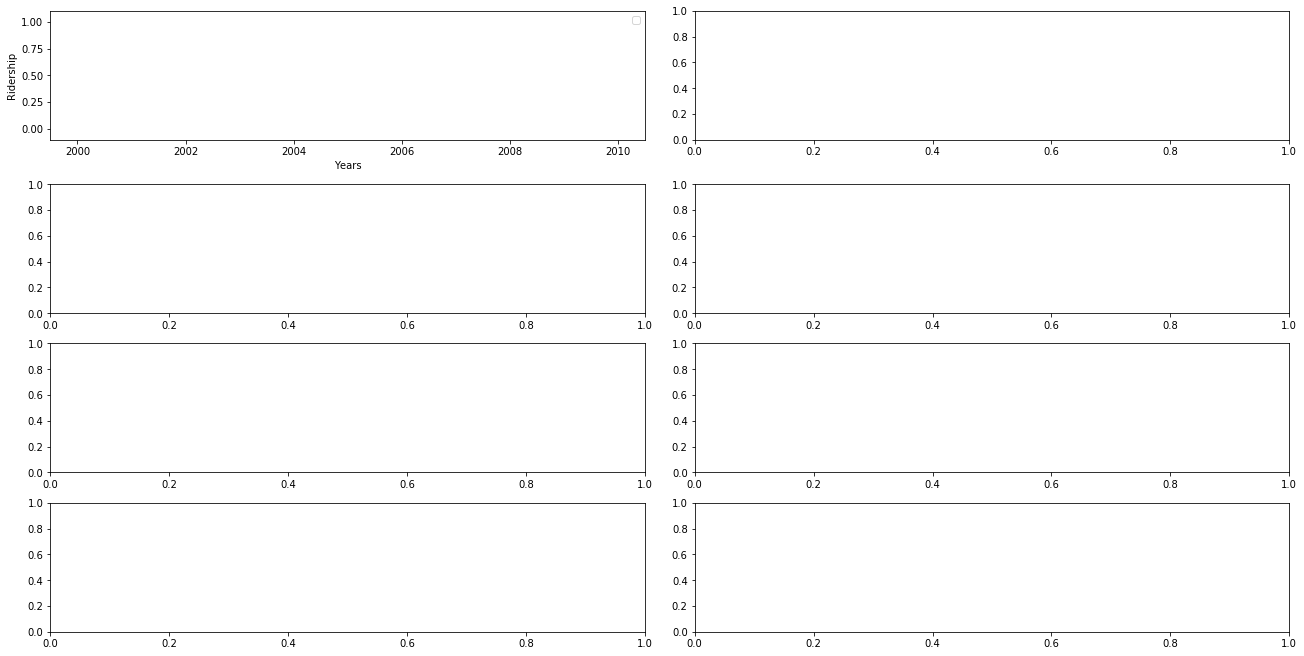

In [122]:
def main():
    FAC_totals_GT_CLUSTERS()
    FAC_totals_gt_grouped_CLUSTERS()
    FAC_totals_APTA_CLUSTERS()
    FAC_totals_apta_grouped_CLUSTERS()

if __name__ == "__main__":
    main()

In [ ]:
# # df, CLUSTER_GT_8_GROUPS, FAC_totals_gt_grouped_CLUSTERS
# def prepare_charts(_df, _clustercolumn, _charinitials,_file_name):
#     df = _df
#     clustercolumn = _clustercolumn
#     chartinitials = _charinitials
#     folder_path = _file_name
#     # get unique clusters
#     clusters = df[clustercolumn].unique()
#     clusters.sort()
#     # get unique modes
#     df.rename(columns={'RAIL_FLAG': 'Mode'}, inplace=True)
#     modes = df['Mode'].unique()
#     modes.sort()
#     # get unique years
#     years = df['Year'].unique()
#     years.sort()      

#     for cluster in clusters:        
#         df_fltr = df[df[clustercolumn] == cluster]
#         # Print the cluster 
#         col_index = df_fltr.columns.get_loc(clustercolumn)
#         cluster_code = str(df_fltr.iloc[0, col_index])
#         print('Cluster Code:' + str(cluster_code))
#         df_fltr['Year'] = pd.to_datetime(df_fltr['Year'].astype(str), format='%Y')
#         df_fltr_mod = df_fltr.set_index(pd.DatetimeIndex(df_fltr['Year']).year)        
#         # get number of sub-plots defined - 4*2 means 4 rows having 2 graphs (each sized 18x9) in each row = 8 graphs
#         fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 9))        
#         x = 1
#         # col_name = ['UPT_ADJ_VRM_ADJ_log_FAC_cumsum','UPT_ADJ_FARE_per_UPT_log_FAC_cumsum','UPT_ADJ_POP_EMP_log_FAC_cumsum','UPT_ADJ_GasPrice_log_FAC_cumsum','UPT_ADJ_PCT_HH_NO_VEH_FAC_cumsum','UPT_ADJ_TSD_POP_PCT_FAC_cumsum','UPT_ADJ_Total_FAC_cumsum']
#         for mode in modes:
#             df_fltr_mode = df_fltr_mod[df_fltr_mod.Mode == mode]            
#             # Year vs Total_FAC_Scaled --> Graph (0,0)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ_Total_FAC_cumsum', label=str(mode), ax=ax[0][0], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[0][0], legend=True, marker='',color='olive',linewidth=2)
#             ax[0][0].set(xlabel="Years", ylabel='Total_FAC_cumsum')
#             ax[0][0].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (1,0)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='POP_EMP_log_FAC_cumsum', label=str(mode), ax=ax[1][0], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[1][0], legend=True, marker='',color='olive',linewidth=2)
#             ax[1][0].set(xlabel="Years", ylabel='POP_EMP_log_FAC_cumsum')
#             ax[1][0].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (2,0)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='TSD_POP_PCT_FAC_cumsum', label=str(mode), ax=ax[2][0], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[2][0], legend=True, marker='',color='olive',linewidth=2)
#             ax[2][0].set(xlabel="Years", ylabel='TSD_POP_PCT_FAC_cumsum')
#             ax[2][0].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (3,0)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='PCT_HH_NO_VEH_FAC_cumsum', label=str(mode), ax=ax[3][0], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[3][0], legend=True, marker='',color='olive',linewidth=2)
#             ax[3][0].set(xlabel="Years", ylabel='PCT_HH_NO_VEH_FAC_cumsum')
#             ax[3][0].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (0,1)
# #             df_fltr_mode.groupby('Mode').plot(x='Year', y='', label=str(mode), ax=ax[0][1], legend=True, marker='',color='skyblue',linewidth=2)
# #             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[0][0], legend=True, marker='',color='olive',linewidth=2)
# #             ax[0][1].set(xlabel="Years", ylabel='')
# #             ax[0][1].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (1,1)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='GasPrice_log_FAC_cumsum', label=str(mode), ax=ax[1][1], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[1][1], legend=True, marker='',color='olive',linewidth=2)
#             ax[1][1].set(xlabel="Years", ylabel='GasPrice_log_FAC_cumsum')
#             ax[1][1].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (2,1)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='FARE_per_UPT_log_FAC_cumsum', label=str(mode), ax=ax[2][1], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[2][1], legend=True, marker='',color='olive',linewidth=2)
#             ax[2][1].set(xlabel="Years", ylabel='FARE_per_UPT_log_FAC_cumsum')
#             ax[2][1].legend(loc='best')            
#             # Year vs Total_FAC_Scaled --> Graph (3,1)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='TSD_POP_PCT_FAC_cumsum', label=str(mode), ax=ax[3][1], legend=True, marker='',color='skyblue',linewidth=2)
#             df_fltr_mode.groupby('Mode').plot(x='Year', y='UPT_ADJ', label=str(mode), ax=ax[3][1], legend=True, marker='',color='olive',linewidth=2)
#             ax[3][1].set(xlabel="Years", ylabel='TSD_POP_PCT_FAC_cumsum')
#             ax[3][1].legend(loc='best')                        
#         fig.suptitle(('Cluster Code:' + str(cluster_code)),fontsize=14)
#         fig.tight_layout()
#         _figno = x

#         # code to let these file save in the specific folder
#         os.chdir(output_folder)
#         # add folder name
# #         save_folder = output_folder +'\\' + folder_path
#         os.path.join(output_folder, folder_path)
#         if not os.path.exists(os.path.join(output_folder, folder_path)):
#             os.mkdir(folder_path)
#             print (folder_path + ": sucessfully created")
#         else:
#             print (folder_path + ": already exists")
            
#         mod = output_folder + "\\" + str(folder_path)
#         os.chdir(mod)
#         fig.savefig(("Fig " + str(_figno) + "-" + cluster_code + ".png"))
#         plt.suptitle(cluster_code,fontsize=14)
#         plt.close(fig)
#         x += 1 

In [ ]:
# col_name = ['VRM_ADJ_log_FAC','FARE_per_UPT_log_FAC','POP_EMP_log_FAC','GasPrice_log_FAC','PCT_HH_NO_VEH_FAC','TSD_POP_PCT_FAC','Total_FAC']
# cum_col = []

# for col in col_name:
#     df[str(col)+'_cum'] = df[col]
#     cum_col.append(str(col)+'_cum')

# list(df.columns)


In [ ]:
# list(cum_col)

In [ ]:
# #aggregate sum to all columns
# df1 = df.groupby(['CLUSTER_GT_NEW_11','RAIL_FLAG','Year', 'CLUSTER_GT_ORIGINAL', 'CLUSTER_APTA', 'CLUSTER_APTA_GROUPED']).sum()
# # df1.head()


In [ ]:
# #aggregate cumcum to Usage column only 
# s = df1.groupby(level=0)['VRM_ADJ_log_FAC_cum','FARE_per_UPT_log_FAC_cum','POP_EMP_log_FAC_cum','GasPrice_log_FAC_cum','PCT_HH_NO_VEH_FAC_cum','TSD_POP_PCT_FAC_cum','Total_FAC_cum'].cumsum()
# # print (s)

In [ ]:
# #join cumsum series to aggregate df1
# df3 = df1.join(s, rsuffix='_cumsum').reset_index()
# os.chdir(output_folder)
# df3.to_csv("sample.csv")
# # print (df3)

In [ ]:
# df.head()

In [ ]:
# cumsum_col = ['VRM_ADJ_log_FAC_cum','FARE_per_UPT_log_FAC_cum','POP_EMP_log_FAC_cum','GasPrice_log_FAC_cum','PCT_HH_NO_VEH_FAC_cum','TSD_POP_PCT_FAC_cum','Total_FAC_cum']
# df2 = df.groupby(by=['CLUSTER_GT_NEW_11','RAIL_FLAG','Year', 'CLUSTER_GT_ORIGINAL', 'CLUSTER_APTA', 'CLUSTER_APTA_GROUPED'], sort=False).sum()
# cols = [col for col in df2.columns if col != cumsum_col]
# df1 = df2.set_index(cols, append=True).groupby(level=[0]).cumsum()
# df1 = df2.assign(Usage_cumsum = df1.reset_index(level=2, drop=True)).reset_index()
# print(df1)

In [ ]:
# columns_for_differencing = ['a']
# df1 = df.copy()[df.columns.difference(columns_for_differencing)]